In [1]:
import re
import math
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import Word2Vec
from matplotlib.ticker import MaxNLocator


In [2]:
#### wordcloud
MAX_WORDS = 20
COLLOCATION = 1 #5
COLLOCATIONS = False

In [4]:
DATA = "../Errors_data.csv"

## Loading the data

In [5]:
df = pd.read_csv(DATA,header=None, names=['Error', 'Category','x','y'])
df = df.drop(['x','y'], axis=1)
df.head(10)


,Error,Category
0,Missing package-info java file,JavadocPackage
1,Utility classes should not have a public or de...,HideUtilityClassConstructor
2,Missing a Javadoc comment,MissingJavadocMethod
3,Parameter args should be final,FinalParameters
4,File contains tab characters (this is the firs...,FileTabCharacter
5,Line has trailing spaces,RegexpSingleline
6,Line has trailing spaces,RegexpSingleline
7,Line is longer than characters (found ),LineLength
8,Line has trailing spaces,RegexpSingleline
9,Line is longer than characters (found ),LineLength


In [6]:
df.shape

(13993, 2)

In [7]:
print("Total unique categories:", df['Category'].nunique())

Total unique categories: 65


In [8]:
math.sqrt(df['Category'].nunique())

8.06225774829855

In [9]:
df.iloc[182]['Error']

"'||' is not preceded with whitespace"

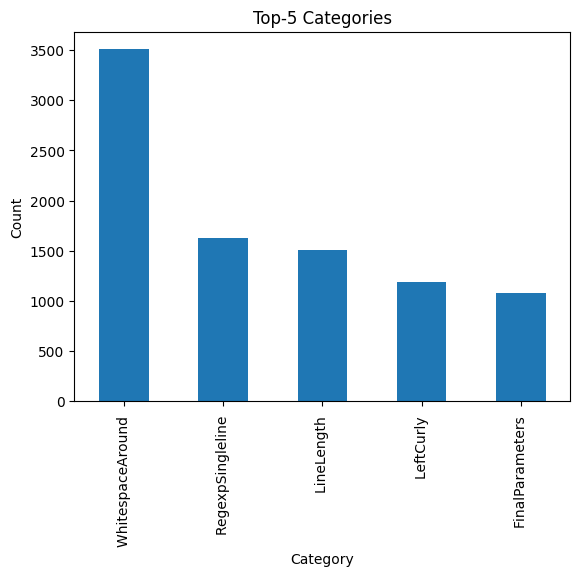

In [10]:
# df['Ctegory'].value_counts().plot.bar()

ax = df['Category'].value_counts().head(5).plot.bar()

ax.set_title('Top-5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

plt.show()

In [14]:
# Remove whitespace around plot
fig = ax.get_figure()
fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./top5_category.pdf', bbox_inches='tight')

<Axes: xlabel='Category'>

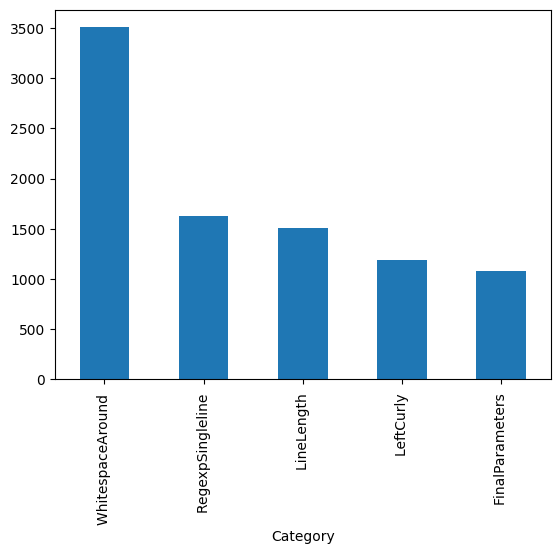

In [15]:
df['Category'].value_counts().head(5).plot.bar()

<Axes: xlabel='Category'>

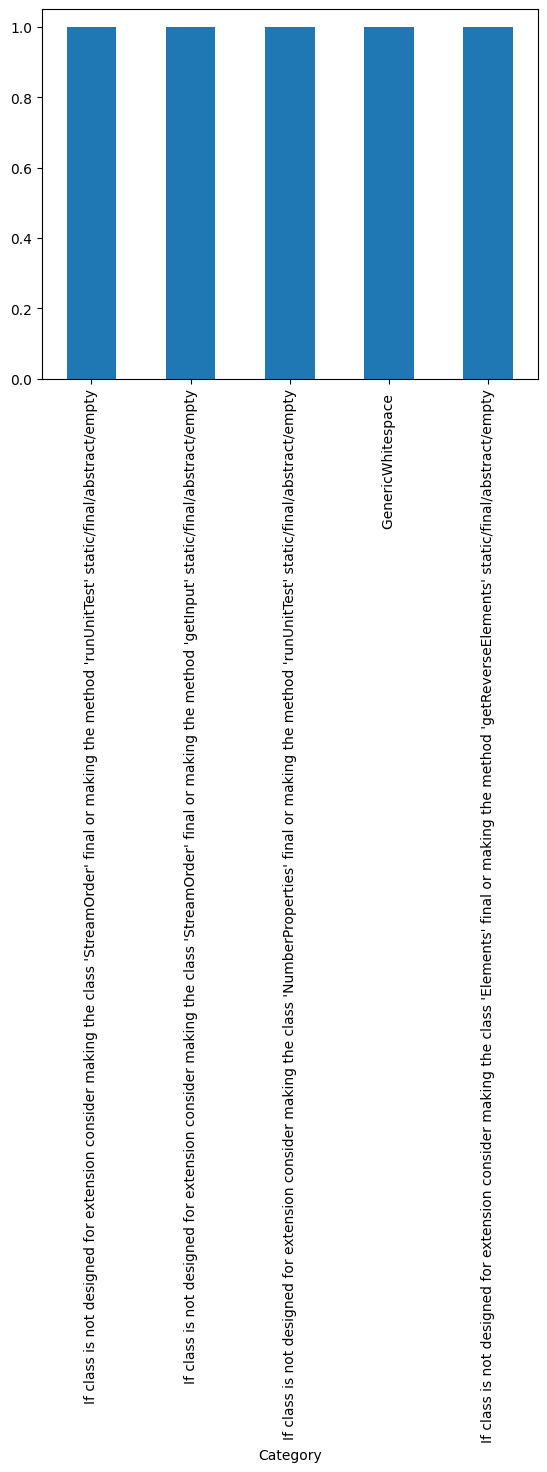

In [16]:
df['Category'].value_counts().tail(5).plot.bar()

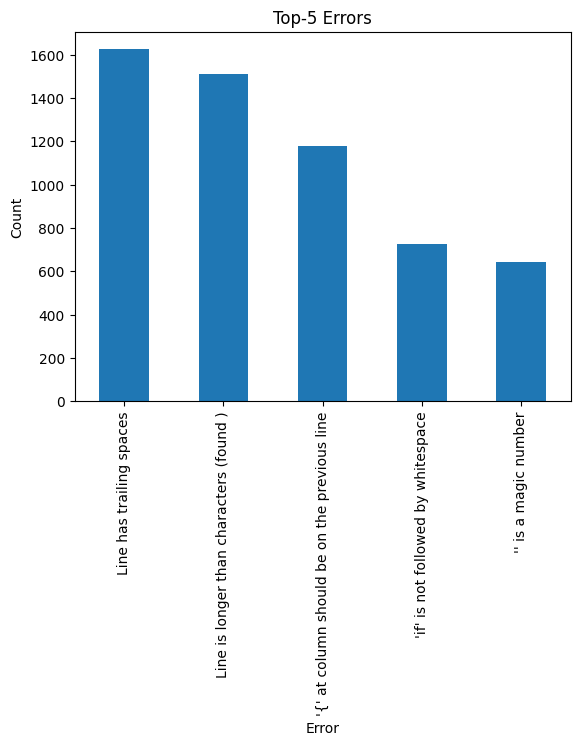

In [17]:
# df['Ctegory'].value_counts().plot.bar()

ax = df['Error'].value_counts().head(5).plot.bar()

ax.set_title('Top-5 Errors')
ax.set_xlabel('Error')
ax.set_ylabel('Count')

plt.show()

In [18]:
# Remove whitespace around plot
fig = ax.get_figure()
# fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./top5_error.pdf', bbox_inches='tight')

## Preprocessing the data

In [19]:
def preprocessing(text):

    # text = text.replace("/home/imhmede/workspace/hello.java:", "")
    # text = text.split()
    # text = [txt for i, txt in enumerate(text) if i!= 1]
    # print(text)
    # text = " ".join(text)
    # text = change_construct(text)
    # text = re.sub(r'[^\w\s\<\>]', '', text)
    # text = [txt.strip() for txt in text.split() if not txt.isdigit()]
    # text = " ".join(text)
    # text = text.replace('_', '')
    # text = text.lower()
    # text = text.replace("error", "<ERROR>")
    # text = text.replace("warn", "<WARN>")
    # # txt = re.sub(' +', ' ', text)
    # text = text.split()
    # text = " ".join(text)
    text = change_name_next(text)
    # text = change_def_next(text)
    text = change_class_next(text)
    text = change_method_next(text)
    text = change_brackets(text)
    text = change_isnot(text)
    text = change_construct(text)
    text = change_use_brackets(text)
    text = change_shouldbe(text)
    text = change_parameter_next(text)

    text = text.lower()
    return text


In [20]:
def change_name_next(text):
    l = text.split()
    j = ['<A_NAME>' if i>0 and l[i-1] in ["Name"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [21]:
def change_def_next(text):
    l = text.split()
    j = ['<A_FUNC_NAME>' if i>0 and l[i-1] in ["def"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [22]:
def change_class_next(text):
    l = text.split()
    j = ['<A_CLASS_NAME>' if i>0 and l[i-1] in ["Class"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [23]:
def change_parameter_next(text):
    l = text.split()
    j = ['<A_PARAMETER_NAME>' if i>0 and l[i-1] in ["Parameter"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [24]:
def change_method_next(text):
    l = text.split()
    j = ['<A_METHOD_NAME>' if i>0 and l[i-1] in ["method"] else l[i] for i in range(len(l))]
    return ' '.join(j)


In [25]:
def change_brackets(text):
    return re.sub(r"'[{()}]'", "<BRAKET>", text)

In [26]:
def change_construct(text):
    return re.sub(r"'[a-zA-Z]+'", "<CONSTRUCT>", text)

In [27]:
def change_isnot(text):
  if " is not" in text:
    new_text = re.sub(r'(^.*) is not', r'<OPERATOR> is not', text)
  else:
    new_text = text

  return new_text

In [28]:
def change_shouldbe(text):
  if " should be on" in text:
    new_text = re.sub(r'(^.*) should be on', r'<OPERATOR> should be on', text)
  else:
    new_text = text

  return new_text

In [29]:
def change_construct(text):
  if " construct must use" in text:
    new_text = re.sub(r'(^.*) construct must use', r'<OPERATOR> construct must use', text)
  else:
    new_text = text

  return new_text

In [30]:
def change_use_brackets(text):
  if "'{}'s" in text:
    new_text = re.sub(r"'{}'s", r"<BRACKET>", text)
  else:
    new_text = text

  return new_text

In [31]:
# n_text = preprocessing(content_list[160])
# print(n_text)


In [32]:
# id_ = 1002
id_ = 103
print(df.iloc[id_]['Error'])

n_text = preprocessing(df.iloc[id_]['Error'])
print(n_text)

'*' is not followed by whitespace
<operator> is not followed by whitespace


## Create a dataframe

In [33]:
df['clean'] = df['Error'].apply(preprocessing)

In [34]:
df.head()

,Error,Category,clean
0,Missing package-info java file,JavadocPackage,missing package-info java file
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...


In [35]:
df.iloc[1]["clean"]

'utility classes should not have a public or default constructor'

In [36]:
df.iloc[114]["clean"]

'<operator> is not preceded with whitespace'

In [37]:
df.iloc[114]["clean"]

'<operator> is not preceded with whitespace'

## Create a Word Cloud

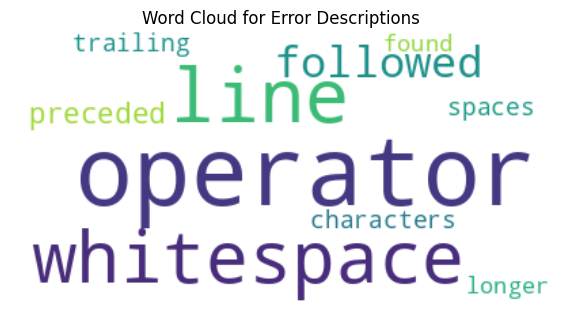

In [38]:
all_text = []
def get_all_text(text):
    all_text.append(text)

df["clean"].apply(get_all_text)
text = "\n".join(all_text)
# print(text)

# wordcloud = WordCloud(background_color="white").generate(text)

#Create the wordcloud object
wordcloud = WordCloud(collocations= False,
                        background_color="white",
                        collocation_threshold = 100,
                        max_words = 10,
                        relative_scaling = 1).generate(text)
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.title("Word Cloud for Error Descriptions")
plt.savefig("./wordcloud.pdf", bbox_inches='tight')
plt.show()

In [39]:
# Process text
frequencies = wordcloud.process_text(text)

print(frequencies)

{'missing': 890, 'package': 395, 'info': 390, 'java': 453, 'file': 650, 'utility': 378, 'classes': 378, 'public': 378, 'default': 380, 'constructor': 378, 'javadoc': 713, 'comment': 691, 'parameter': 1080, 'a_parameter_name': 1080, 'final': 1080, 'contains': 370, 'tab': 72, 'characters': 1582, 'first': 279, 'instance': 72, 'line': 4668, 'trailing': 1624, 'spaces': 1624, 'longer': 1510, 'found': 1510, 'magic': 711, 'number': 711, 'operator': 6039, 'preceded': 1853, 'whitespace': 4656, 'previous': 1193, 'followed': 2803, 'end': 394, 'newline': 187, 'array': 49, 'illegal': 47, 'position': 47, 'construct': 131, 'must': 508, 'use': 131, 'bracket': 178, 'placed': 191, 'wrong': 191, 'location': 191, 'next': 298, 'part': 298, 'multi': 298, 'block': 600, 'statement': 341, 'one': 300, 'directly': 298, 'multiple': 298, 'try': 298, 'catch': 298, 'finally': 298, 'unused': 92, 'import': 65, 'io': 12, 'name': 317, 'a_name': 316, 'match': 315, 'pattern': 315, 'za': 627, 'z': 315, "int'": 26, 'sentence

## Using Doc2Vec

In [40]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [41]:
DIMENSIONS = 64
WINDOW = 5

In [42]:
all_texts = df['clean'].tolist()
all_texts = [text.split() for text in all_texts]
print(len(all_texts))

13993


In [43]:
print(all_texts[:2])
print(all_texts[-2:])

[['missing', 'package-info', 'java', 'file'], ['utility', 'classes', 'should', 'not', 'have', 'a', 'public', 'or', 'default', 'constructor']]
[['line', 'has', 'trailing', 'spaces'], ['line', 'has', 'trailing', 'spaces']]


In [44]:
df["textList"] = all_texts

In [45]:
df

,Error,Category,clean,textList
0,Missing package-info java file,JavadocPackage,missing package-info java file,"[missing, package-info, java, file]"
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...,"[utility, classes, should, not, have, a, publi..."
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment,"[missing, a, javadoc, comment]"
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi..."
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...,"[file, contains, tab, characters, (this, is, t..."
...,...,...,...,...
13988,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi..."
13989,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"
13990,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"
13991,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]"


In [46]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(all_texts)]

### Get embeddings for multiple dimensions

In [47]:
dims = [16, 32, 64, 128, 256, 512]

for dim in dims:
    print(f"Doc2Vec for {dim} dimensions")
    # Init model
    doc2_vec_model = Doc2Vec(documents, vector_size=dim, epochs=20, window=WINDOW, min_count=5, seed=0)

    # Get vectors
    all_d2v_vecs = [doc2_vec_model.dv[i] for i in range(len(doc2_vec_model.dv))]

    # Add to df
    col_name = 'embedding_' + str(dim)
    df[col_name] = all_d2v_vecs

Doc2Vec for 16 dimensions
Doc2Vec for 32 dimensions
Doc2Vec for 64 dimensions
Doc2Vec for 128 dimensions
Doc2Vec for 256 dimensions
Doc2Vec for 512 dimensions


In [48]:
df.head()

,Error,Category,clean,textList,embedding_16,embedding_32,embedding_64,embedding_128,embedding_256,embedding_512
0,Missing package-info java file,JavadocPackage,missing package-info java file,"[missing, package-info, java, file]","[-0.020786954, 0.10096427, 0.06689861, 0.02786...","[0.08983533, 0.16259053, 0.0379792, 0.02052337...","[0.0051400485, 0.015249636, -0.018411381, -0.0...","[0.046530757, -0.028003024, 0.017651016, 0.025...","[0.033999085, -0.00010671813, -0.026917968, -0...","[0.0044744536, 0.0027532997, -0.022001958, 0.0..."
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...,"[utility, classes, should, not, have, a, publi...","[-0.056484606, 0.10655956, -0.016981056, 0.001...","[0.03642323, 0.04437619, -0.026060775, -0.0057...","[-0.012755864, -0.06158496, 0.041035652, -0.02...","[0.0071776947, -0.014533329, -0.0030333663, 0....","[0.0049930178, -0.015992474, -0.022407476, 0.0...","[-0.0024499148, -0.0003389456, -0.0054792454, ..."
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment,"[missing, a, javadoc, comment]","[0.042097162, 0.19575374, -0.065909825, 0.0889...","[0.11360577, 0.12294841, 0.08685094, 0.0617528...","[0.07775649, -0.007812605, 0.060900353, -0.045...","[0.017690511, -0.019954056, 0.023757454, 0.033...","[0.027701082, -0.0130960485, -0.030088408, -0....","[-0.0051536667, -0.0058729155, -0.013779759, 0..."
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi...","[0.022309009, -0.021507645, 0.0430508, -0.0671...","[0.078750394, 0.091248944, 0.029156758, 0.0082...","[0.033342227, 0.01531933, 0.054551654, -0.0610...","[0.027908793, -0.039979167, 0.004942894, 0.061...","[0.0014062958, -0.014850111, -0.022861613, 0.0...","[0.0018124045, 0.008401314, 0.00438754, 0.0244..."
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...,"[file, contains, tab, characters, (this, is, t...","[0.04316136, -0.015873155, 0.045204766, 0.1130...","[0.025382416, 0.017307987, -0.0369536, 0.02463...","[0.015964692, 0.0057203234, 0.024125999, 0.019...","[0.022641249, -0.0057162303, -0.02730995, 0.00...","[0.026538406, 0.010333137, -0.003303986, 0.001...","[0.019207833, 0.0074250023, -0.021491263, 0.01..."


In [49]:
#doc2_vec_model = Doc2Vec(documents, vector_size=DIMENSIONS, window=WINDOW, min_count=5, seed=0)

In [50]:
#len(doc2_vec_model.dv)

In [51]:
#doc2_vec_model.dv[0]

In [52]:
#all_d2v_vecs = [doc2_vec_model.dv[i] for i in range(len(doc2_vec_model.dv))]
#print(len(all_d2v_vecs))

In [53]:
#df["d2v"] = all_d2v_vecs

In [54]:
#df.head()

In [64]:
print(df['embedding_64'].shape)
print(df['embedding_64'][0].shape)

(13993,)
(64,)


### Get the explained variance

In [65]:
from sklearn.decomposition import PCA

In [66]:
# PCA analysis
variance_explained = []
for dim in dims:
    col = 'embedding_'+str(dim)
    print(col)
    embeddings=df[col].tolist()
    pca = PCA(n_components=2)
    pca.fit(embeddings)
    variance_explained.append(pca.explained_variance_ratio_.sum().round(2))

embedding_16
embedding_32
embedding_64
embedding_128
embedding_256
embedding_512


In [67]:
print(variance_explained)

[0.38, 0.4, 0.42, 0.43, 0.45, 0.47]


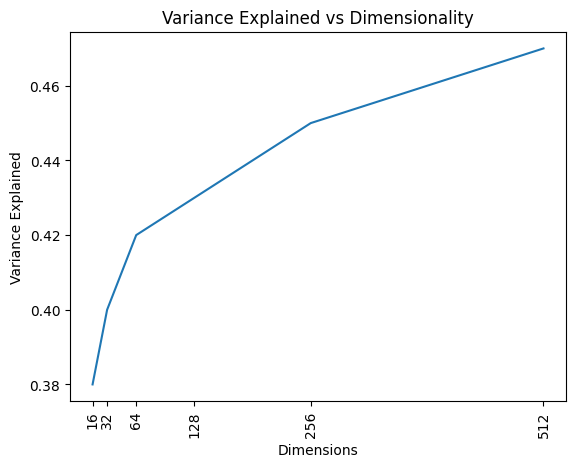

In [68]:
# Plot variance explained
import matplotlib.pyplot as plt
plt.plot(dims, variance_explained)
# Set x ticks
plt.xticks(dims,rotation=90)

plt.title('Variance Explained vs Dimensionality')
plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.savefig("./embeddings_variance.pdf", bbox_inches='tight')
plt.show()

Best Doc2Vec dimension seems to be 128

## Let's find the best k for clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [70]:
# Range of k to check
k_range = range(2, 20)

sil_scores = []
cal_scores = []

for k in k_range:
  # Cluster data into k clusters
  kmeans = KMeans(n_clusters=k)
  clusters = kmeans.fit_predict(df['embedding_128'].tolist())

  # Score with metrics
  sil_score = silhouette_score(df['embedding_128'].tolist(), clusters)
  sil_scores.append(sil_score)

  cal_score = calinski_harabasz_score(df['embedding_128'].tolist(), clusters)
  cal_scores.append(cal_score)


/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bass

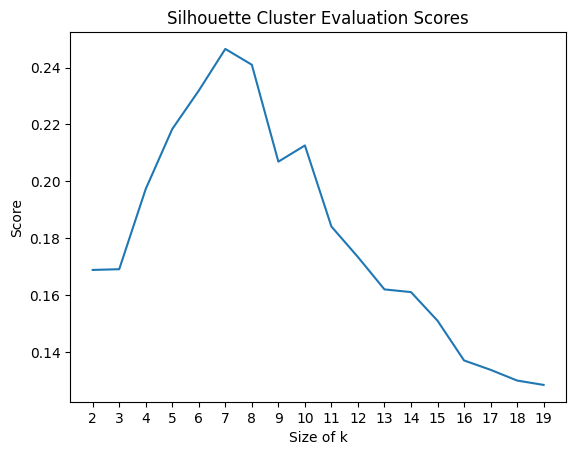

In [72]:
# Plot scores
plt.plot(k_range, sil_scores, label='Silhouette')
new_list = range(math.floor(min(k_range)), math.ceil(max(k_range))+1)
plt.xticks(new_list)
plt.title('Silhouette Cluster Evaluation Scores')
plt.xlabel('Size of k')
plt.ylabel('Score')
#plt.legend()
plt.savefig("./shilouette_k.pdf", bbox_inches='tight')
plt.show()

In [73]:
print(sil_scores)

[0.16881429, 0.16907611, 0.19731712, 0.21840046, 0.23191269, 0.2465758, 0.24100184, 0.20690852, 0.21261531, 0.18408589, 0.1733538, 0.16196842, 0.16101746, 0.15096292, 0.13697748, 0.13367565, 0.12990345, 0.12836157]


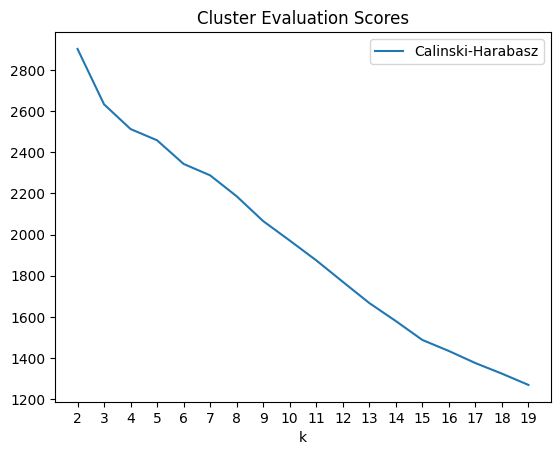

In [74]:
# Plot scores
plt.plot(k_range, cal_scores, label='Calinski-Harabasz')
new_list = range(math.floor(min(k_range)), math.ceil(max(k_range))+1)
plt.xticks(new_list)
plt.title('Cluster Evaluation Scores')
plt.xlabel('k')
plt.legend()
plt.show()

It looks that k=7 is fine

### Lets use the 128 dimensions and 7 clusters

In [75]:
all_d2v_vecs = df['embedding_128'].tolist()

In [76]:
np.shape(all_d2v_vecs)

(13993, 128)

In [77]:
all_d2v_vecs[0]

array([ 4.65307571e-02, -2.80030239e-02,  1.76510159e-02,  2.58537810e-02,
       -8.44368618e-03,  2.02793069e-02, -4.96759340e-02, -3.55212055e-02,
        4.72903671e-03, -2.31678989e-02,  4.53469269e-02,  2.84631941e-02,
       -3.78148444e-02, -3.49228643e-02,  2.19352432e-02, -9.06574540e-03,
        2.98964907e-03,  1.70572493e-02,  1.85984913e-02, -1.66763403e-02,
        1.62759516e-03,  1.28895938e-02,  5.23671359e-02, -4.18915339e-02,
       -2.26227101e-02, -1.00380061e-02,  8.69263196e-04,  4.77367043e-02,
        9.43654217e-03, -2.98446529e-02, -3.17643443e-03, -5.32218069e-02,
       -1.91425700e-02,  2.51342766e-02, -2.85559483e-02,  1.45901199e-02,
       -1.95088014e-02, -3.92069742e-02,  1.67359393e-02,  9.00169183e-03,
        3.35937068e-02, -1.91695131e-02, -2.83634942e-02,  1.28412507e-02,
        6.98833319e-05, -6.87235547e-03,  4.77441661e-02,  2.65697222e-02,
       -1.18336519e-02,  1.01395594e-02, -1.35812303e-02, -3.04339193e-02,
        1.44260116e-02,  

In [78]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(all_d2v_vecs)

/home/bassturtle4/Desktop/SynologyDrive/2023yearproject/Training/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
kmeans.labels_

array([3, 4, 3, ..., 1, 1, 1], dtype=int32)

In [80]:
df["d2v_clusters"] = kmeans.labels_
df

,Error,Category,clean,textList,embedding_16,embedding_32,embedding_64,embedding_128,embedding_256,embedding_512,d2v_clusters
0,Missing package-info java file,JavadocPackage,missing package-info java file,"[missing, package-info, java, file]","[-0.020786954, 0.10096427, 0.06689861, 0.02786...","[0.08983533, 0.16259053, 0.0379792, 0.02052337...","[0.0051400485, 0.015249636, -0.018411381, -0.0...","[0.046530757, -0.028003024, 0.017651016, 0.025...","[0.033999085, -0.00010671813, -0.026917968, -0...","[0.0044744536, 0.0027532997, -0.022001958, 0.0...",3
1,Utility classes should not have a public or de...,HideUtilityClassConstructor,utility classes should not have a public or de...,"[utility, classes, should, not, have, a, publi...","[-0.056484606, 0.10655956, -0.016981056, 0.001...","[0.03642323, 0.04437619, -0.026060775, -0.0057...","[-0.012755864, -0.06158496, 0.041035652, -0.02...","[0.0071776947, -0.014533329, -0.0030333663, 0....","[0.0049930178, -0.015992474, -0.022407476, 0.0...","[-0.0024499148, -0.0003389456, -0.0054792454, ...",4
2,Missing a Javadoc comment,MissingJavadocMethod,missing a javadoc comment,"[missing, a, javadoc, comment]","[0.042097162, 0.19575374, -0.065909825, 0.0889...","[0.11360577, 0.12294841, 0.08685094, 0.0617528...","[0.07775649, -0.007812605, 0.060900353, -0.045...","[0.017690511, -0.019954056, 0.023757454, 0.033...","[0.027701082, -0.0130960485, -0.030088408, -0....","[-0.0051536667, -0.0058729155, -0.013779759, 0...",3
3,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi...","[0.022309009, -0.021507645, 0.0430508, -0.0671...","[0.078750394, 0.091248944, 0.029156758, 0.0082...","[0.033342227, 0.01531933, 0.054551654, -0.0610...","[0.027908793, -0.039979167, 0.004942894, 0.061...","[0.0014062958, -0.014850111, -0.022861613, 0.0...","[0.0018124045, 0.008401314, 0.00438754, 0.0244...",6
4,File contains tab characters (this is the firs...,FileTabCharacter,file contains tab characters (this is the firs...,"[file, contains, tab, characters, (this, is, t...","[0.04316136, -0.015873155, 0.045204766, 0.1130...","[0.025382416, 0.017307987, -0.0369536, 0.02463...","[0.015964692, 0.0057203234, 0.024125999, 0.019...","[0.022641249, -0.0057162303, -0.02730995, 0.00...","[0.026538406, 0.010333137, -0.003303986, 0.001...","[0.019207833, 0.0074250023, -0.021491263, 0.01...",4
...,...,...,...,...,...,...,...,...,...,...,...
13988,Parameter args should be final,FinalParameters,parameter <a_parameter_name> should be final,"[parameter, <a_parameter_name>, should, be, fi...","[-0.04472071, -0.052653395, 0.10609175, -0.044...","[0.052218057, 0.1568526, 0.08087563, 0.0440476...","[0.052102022, -0.016374646, 0.031454097, -0.05...","[0.018056268, -0.036576446, 0.00044487783, 0.0...","[-0.0102502545, 0.012521232, -0.027437862, 0.0...","[0.0039928337, 0.0041400385, -0.008404234, 0.0...",6
13989,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]","[0.07011451, -0.018463802, -0.11870359, 0.0200...","[0.08190379, 0.12500623, 0.07286869, 0.0691072...","[0.047725607, -0.043557685, 0.06741346, -0.029...","[0.009279226, -0.0344831, -0.0132594295, -0.02...","[0.016380074, -0.018516699, -0.0336498, 0.0246...","[-0.0038286257, -0.0009190942, -0.004244009, 0...",1
13990,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]","[0.064582996, 0.004800853, -0.057709534, -0.03...","[0.020510986, 0.13509709, 0.105639316, 0.11950...","[0.057278935, -0.031364985, 0.04351981, -0.055...","[-0.003117432, -0.029711382, 0.0009364558, -0....","[0.0142743355, -0.021172138, -0.052057106, 0.0...","[-0.0032363767, 0.0024782657, -0.010697833, -0...",1
13991,Line has trailing spaces,RegexpSingleline,line has trailing spaces,"[line, has, trailing, spaces]","[0.13132797, -0.0952668, -0.1321964, -0.112697...","[0.048927214, 0.11106054, 0.050291013, 0.11606...","[0.09185143, -0.05751

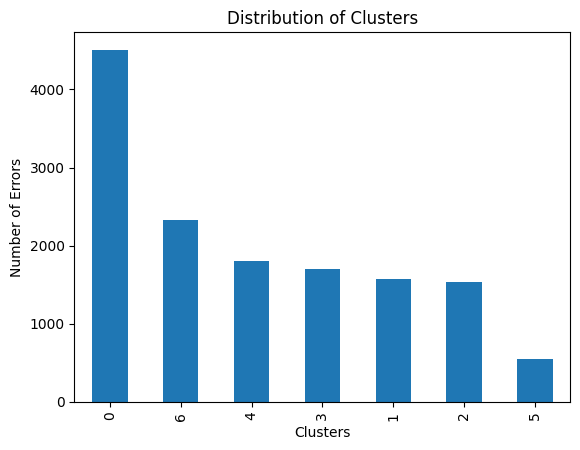

In [81]:
ax = df['d2v_clusters'].value_counts().plot.bar()

ax.set_title('Distribution of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Number of Errors')

plt.show()

In [82]:
# Remove whitespace around plot
fig = ax.get_figure()
# fig.tight_layout()

# Save just the plot area to PDF
fig.savefig('./hist_clusters.pdf', bbox_inches='tight')

In [83]:
clust_number = 2
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

7         line is longer than characters (found )
9         line is longer than characters (found )
19                 missing package-info java file
28        line is longer than characters (found )
29        line is longer than characters (found )
                           ...                   
13941    <operator> is not followed by whitespace
13946     line is longer than characters (found )
13952     line is longer than characters (found )
13954     line is longer than characters (found )
13964     line is longer than characters (found )
Name: clean, Length: 1539, dtype: object
1539


In [84]:
clust_number = 0
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

18          line is longer than characters (found )
21       <operator> is not preceded with whitespace
27          line is longer than characters (found )
31         <operator> is not followed by whitespace
32       <operator> is not preceded with whitespace
                            ...                    
13957      <operator> is not followed by whitespace
13958      <operator> is not followed by whitespace
13973      <operator> is not followed by whitespace
13974      <operator> is not followed by whitespace
13976    <operator> is not preceded with whitespace
Name: clean, Length: 4507, dtype: object
4507


In [85]:
clust_number = 5
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

296      <operator> should be on the same line as the n...
331                        'int' is followed by whitespace
384                        'int' is followed by whitespace
402                        'int' is followed by whitespace
405                        'int' is followed by whitespace
                               ...                        
13880    class <a_class_name> looks like designed for e...
13916    <operator> should be on the same line as the n...
13942                      ';' is preceded with whitespace
13970                 <braket> is preceded with whitespace
13975                 <braket> is preceded with whitespace
Name: clean, Length: 546, dtype: object
546


In [86]:
clust_number = 1
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

5        line has trailing spaces
6        line has trailing spaces
8        line has trailing spaces
22       line has trailing spaces
23       line has trailing spaces
                   ...           
13968    line has trailing spaces
13989    line has trailing spaces
13990    line has trailing spaces
13991    line has trailing spaces
13992    line has trailing spaces
Name: clean, Length: 1568, dtype: object
1568


In [87]:
clust_number = 6
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

3             parameter <a_parameter_name> should be final
11       utility classes should not have a public or de...
13            parameter <a_parameter_name> should be final
25            parameter <a_parameter_name> should be final
26               <operator> should be on the previous line
                               ...                        
13981            <operator> should be on the previous line
13982            <operator> should be on the previous line
13984                       missing package-info java file
13986            <operator> should be on the previous line
13988         parameter <a_parameter_name> should be final
Name: clean, Length: 2325, dtype: object
2325


In [ ]:
clust_number = 3
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

In [ ]:
clust_number = 4
print(df[df['d2v_clusters'] == clust_number]['clean'])
print(df[df['d2v_clusters'] == clust_number]['clean'].count())

### Silhouette Score

In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer


# Assuming 'embedding128' is your pandas Series containing embeddings
# Convert the Series to a list of lists
embedding_list = df['embedding_128'].tolist()
embedding_list_of_lists = np.array([embedding.tolist() for embedding in embedding_list])

# Create a SilhouetteVisualizer instance
title = "Silhouette Plot of k-means Clustering"
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', title=title)


# Fit the visualizer with the standardized embedding data
visualizer.fit(embedding_list_of_lists)
# Export the plot to a PDF with a tight layout
visualizer.show(outpath="./silhouette_plot.pdf")

# Display the visualization
visualizer.poof()

### Let's use UMAP to plot the clusters


In [ ]:
data_embeds = pd.DataFrame()
data_embeds['embeds'] = df["embedding_128"]
print(data_embeds.head())
print(data_embeds.shape)


In [ ]:
!pip install --quiet umap-learn


In [ ]:
import umap # REDUCE DIMENSIONALITY
import seaborn as sns
sns.color_palette('colorblind')

In [ ]:
X_umap = umap.UMAP().fit_transform(data_embeds['embeds'].tolist())

In [ ]:
X_umap

In [ ]:
data_df = pd.DataFrame()
data_df['x'] = X_umap[:,0]
data_df['y'] = X_umap[:, 1]
data_df['cluster'] = df['d2v_clusters']

In [ ]:
data_df

In [ ]:
data_df['clus'] = data_df['cluster'].apply(lambda x: str(x))
data_df

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data_df, x="x", y="y", hue='clus')
plt.show()

What about PCA and Doc2Vec?

In [ ]:
#Getting unique labels
pca = PCA(2)
#Transform the data
X_pca = pca.fit_transform(data_embeds['embeds'].tolist())
X_pca

In [ ]:
data_df = pd.DataFrame()
data_df['x'] = X_pca[:,0]
data_df['y'] = X_pca[:, 1]
data_df['cluster'] = df['d2v_clusters']

In [ ]:
data_df

In [ ]:
data_df['clus'] = data_df['cluster'].apply(lambda x: str(x))
data_df

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data_df, x="x", y="y", hue='clus')

plt.title("Clusters of errors")
plt.savefig("./cluster_errors.pdf", bbox_inches='tight')
plt.show()

### t-SNE

## Let's get error closest to the centroid in each cluster

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
len(centroids)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Find closest to each centroid
closest_docs = []
for c, centroid in enumerate(centroids):
    nbrs = NearestNeighbors(n_neighbors=1).fit(df[df['d2v_clusters']==c]['embedding_128'].tolist())
    distances, indices = nbrs.kneighbors(centroid.reshape(1,-1))
    closest_doc = df[df['d2v_clusters']==c]['clean'].iloc[indices[0,0]]
    closest_doc_cat = df[df['d2v_clusters']==c]['Category'].iloc[indices[0,0]]
    closest_docs.append({c:[closest_doc, closest_doc_cat]})

In [ ]:
closest_docs

### Checking the XML file

* {0: ['parameter <a_parameter_name> should be final', 'FinalParameters ']}, Miscellaneous other checks.
* {1: ['<operator> is not preceded with whitespace', 'WhitespaceAround ']}, Checks for whitespace.
* {2: ['line is longer than characters (found )', 'LineLength ']},Checks for Size Violations
* {3: ['<braket> is followed by whitespace', 'ParenPad ']},Checks for whitespace    
* {4: ['line has trailing spaces', 'RegexpSingleline ']},Miscellaneous other checks.
*  {5: ["name <a_name> must match pattern '^a-za-za-z-*$'", 'TypeName ']},Checks for Naming Conventions.
* {6: ['missing a javadoc comment', 'MissingJavadocMethod ']},Checks for Javadoc comments


## Let's try summarizing the whole cluster

In [ ]:
!pip3 install gensim==3.6.0 # summarization was deprecated from 4.0

In [ ]:
from gensim.summarization import summarize

In [ ]:
# Group docs by cluster
docs_by_cluster = df.groupby('d2v_clusters')['Error']

In [ ]:
texts = []
for d in docs_by_cluster:
    #print(d[1].values)
    text = ".".join(txt for txt in d[1].values)
    texts.append(text)

In [ ]:
len(texts)

In [ ]:
# Generate summary for each cluster (didn't work well)
#cluster_summaries = {}
#for cluster_id, cluster_docs in enumerate(texts):
#    #all_text = " ".join(cluster_docs.values)
#    #print(cluster_docs)
#    summary = summarize(cluster_docs, word_count=10)
#    cluster_summaries[cluster_id] = summary

In [ ]:
texts[0]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[0])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[0])

print(frequencies)

In [ ]:
texts[1]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[1])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[1])

print(frequencies)

In [ ]:
texts[2]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[2])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[2])

print(frequencies)

In [ ]:
texts[3]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[3])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[3])

print(frequencies)

In [ ]:
texts[4]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[4])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[4])

print(frequencies)

In [ ]:
texts[5]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[5])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
# Process text
frequencies = wordcloud.process_text(texts[5])

print(frequencies)

In [ ]:
texts[6]

In [ ]:

#Create the wordcloud object
wordcloud = WordCloud(collocations= COLLOCATIONS,
                        background_color="white",
                        collocation_threshold = COLLOCATION,
                        max_words = MAX_WORDS,
                        relative_scaling = 1).generate(texts[6])
#plot
plt.figure(figsize=(7,5), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

In [ ]:
 # Process text
frequencies = wordcloud.process_text(texts[6])

print(frequencies)